##Import Data


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

In [ ]:
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets
display(X.head())
display(y.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


##Data Exploration

In [ ]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,0,0,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,0,0,1,0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [ ]:
X.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

##Data Preprocessing

In [ ]:
label_encode_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
one_hot_encode_cols = ['CAEC', 'CALC', 'MTRANS']

label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X_cleaned = pd.get_dummies(X, columns=one_hot_encode_cols)

X_cleaned = pd.DataFrame(X_cleaned)
#cast
X_cleaned[['CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking']] = X_cleaned[['CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking']].astype(int)
X_cleaned.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,0,0,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,0,0,1,0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
y['NObeyesdad'] = y['NObeyesdad'].map(mapping)
y

<ipython-input-31-f1194c801af8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['NObeyesdad'] = y['NObeyesdad'].map(mapping)


,NObeyesdad
0,1
1,1
2,1
3,2
4,3
...,...
2106,6
2107,6
2108,6
2109,6


##Plot the data


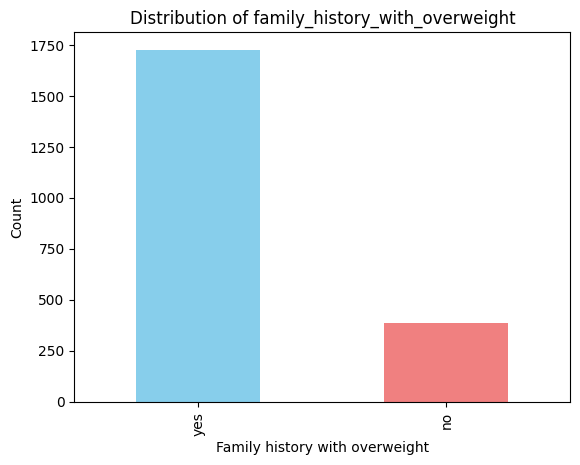

In [ ]:
categorical_feature = 'family_history_overweight'
X["family_history_with_overweight"].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title(f'Distribution of family_history_with_overweight')
plt.xlabel('Family history with overweight')
plt.ylabel('Count')
plt.show()

In [ ]:
def draw_pie(col):
  value_counts = X[col].value_counts()

  plt.figure(figsize=(8, 8))
  plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
  plt.title(f'Pie Chart for {col}')
  plt.axis('equal')
  plt.show()

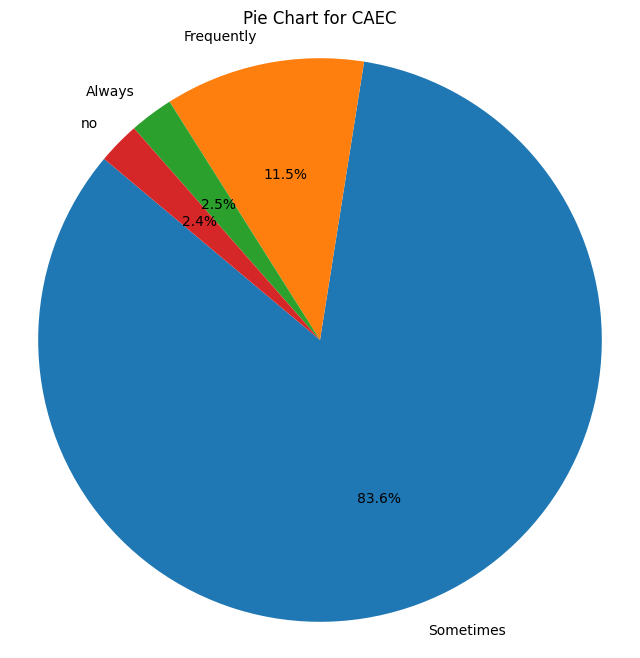

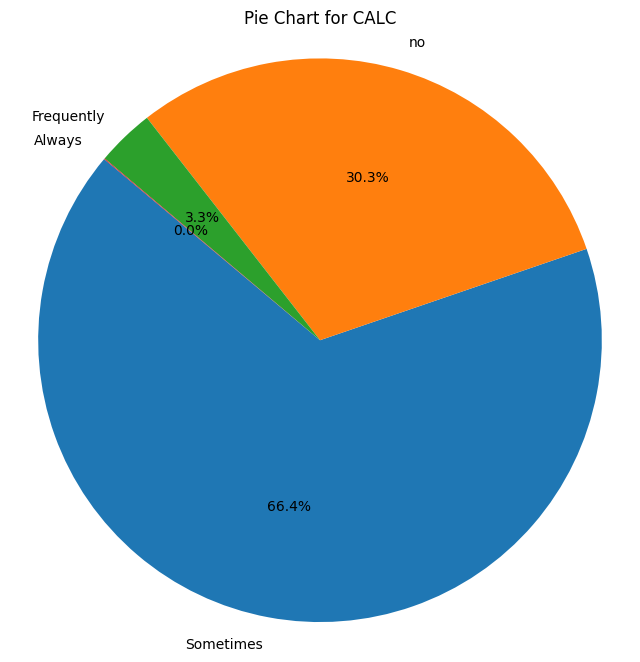

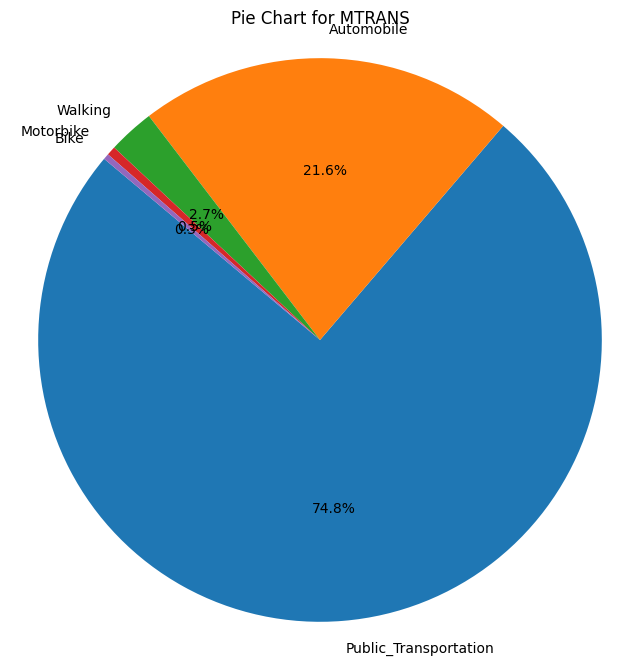

In [ ]:
for col in ['CAEC', 'CALC', 'MTRANS']:
  draw_pie(col)

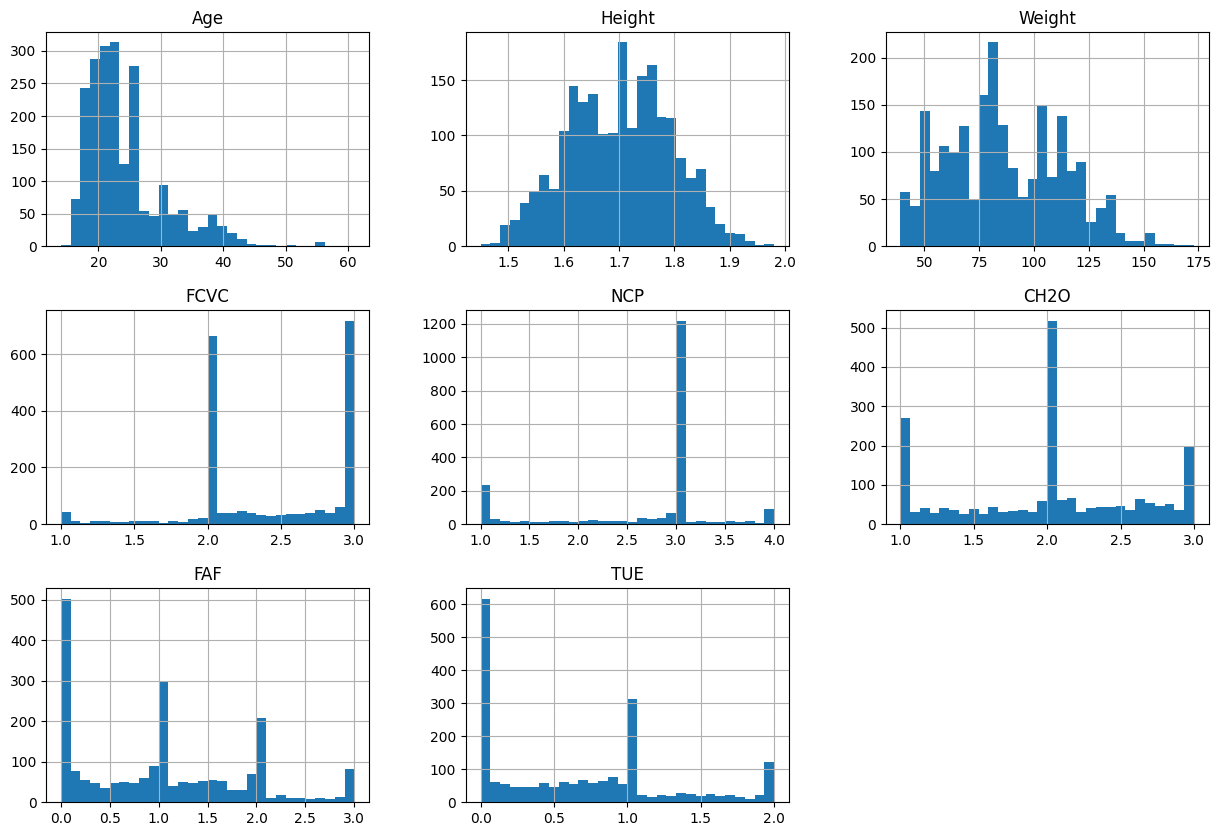

In [ ]:
X.hist(bins=30, figsize=(15, 10))
plt.show()

In [ ]:
X_cleaned.cov()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Gender,0.250083,0.153580,2.885776e-02,2.117485,0.019801,0.010403,-0.073295,0.026302,0.003194,0.033083,...,0.004833,2.341605e-04,0.003121,-0.008908,0.005553,0.028338,0.001639,0.001628,-0.034766,0.003160
Age,0.153580,40.271313,-1.537006e-02,33.667180,0.504256,0.129916,0.055198,-0.216968,0.083414,-0.176222,...,-0.060226,-1.569953e-03,0.093839,-0.037437,-0.054833,1.580760,0.001333,0.009271,-1.527035,-0.064328
Height,0.028858,-0.015370,8.705789e-03,1.131795,0.008926,0.005332,-0.001899,0.017689,0.000740,0.012203,...,-0.001370,-7.949542e-07,0.000761,0.004721,-0.005481,0.002992,0.000156,-0.000070,-0.003632,0.000554
Weight,2.117485,33.667180,1.131795e+00,685.977477,5.025968,2.284846,3.022323,2.189976,0.096357,3.220031,...,-0.427423,-1.023036e-02,-0.195968,3.213072,-3.006874,-0.146942,-0.032750,-0.070354,0.674423,-0.424378
family_history_with_overweight,0.019801,0.504256,8.926213e-03,5.025968,0.149187,0.025743,0.008326,0.021448,0.000960,0.034906,...,-0.011232,8.643508e-05,-0.001532,-0.004497,0.005943,0.015804,-0.000343,-0.001419,-0.009878,-0.004164
FAVC,0.010403,0.129916,5.331682e-03,2.284846,0.025743,0.102638,-0.004667,-0.001745,-0.002319,0.001909,...,-0.001460,5.500414e-05,-0.003259,0.021137,-0.017933,0.007601,-0.001511,-0.000817,0.003968,-0.009242
FCVC,-0.073295,0.055198,-1.899112e-03,3.022323,0.008326,-0.004667,0.285078,0.017537,0.001093,0.022406,...,-0.008520,-1.985986e-04,-0.001784,0.020893,-0.018910,-0.013428,-0.000916,-0.000289,0.013432,0.001201
NCP,0.026302,-0.216968,1.768929e-02,2.189976,0.021448,-0.001745,0.017537,0.605344,0.000868,0.027225,...,-0.017485,-7.988759e-04,-0.002665,0.036503,-0.033039,0.017123,0.001043,0.000217,-0.019196,0.000813
SMOKE,0.003194,0.083414,7.399519e-04,0.096357,0.000960,-0.002319,0.001093,0.000868,0.020418,-0.002802,...,-0.000030,-9.878295e-06,0.002626,0.000852,-0.003469,0.000699,-0.000069,0.000365,-0.001390,0.000395
CH2O,0.033083,-0.176222,1.220329e-02,3.220031,0.034906,0.001909,0.022406,0.027225,-0.002802,0.375712,...,0.014969,-3.796874e-06,0.005428,0.018032,-0.023456,-0.011675,0.000921,-0.000042,0.009977,0.000818


In [ ]:
def draw_Scatter(df,x,y,size=(10,6)):
    # Scatter plot
    plt.figure(figsize=size)
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(f'Scatter Plot between {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

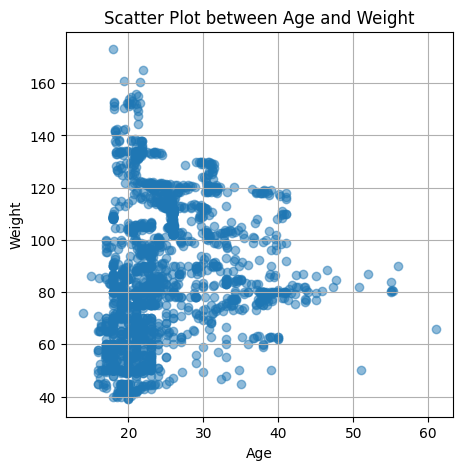

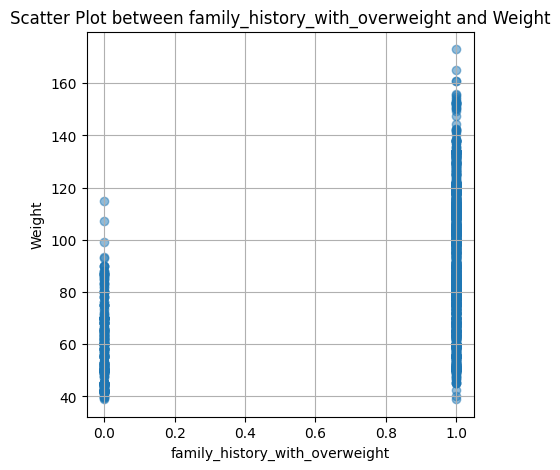

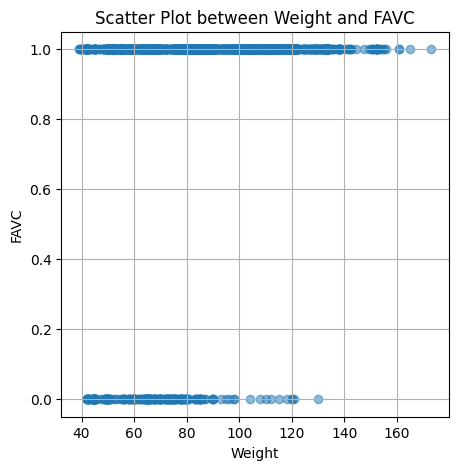

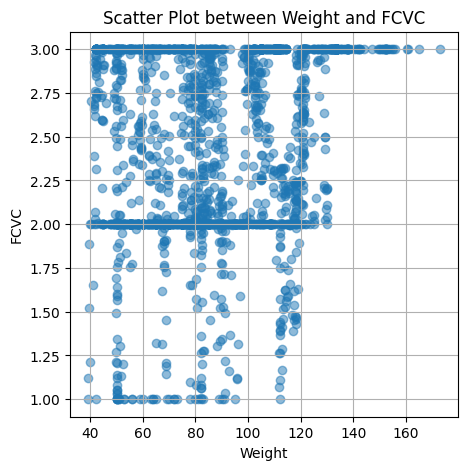

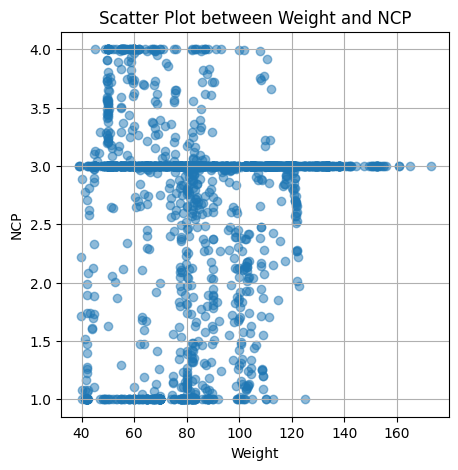

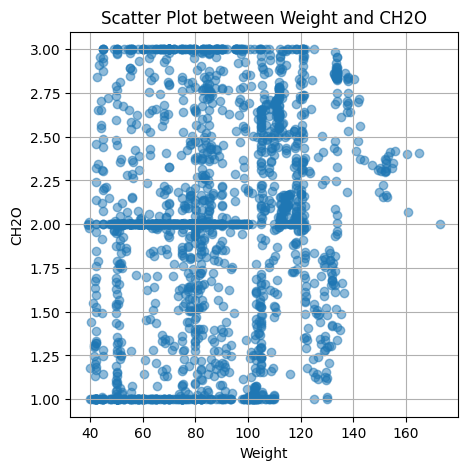

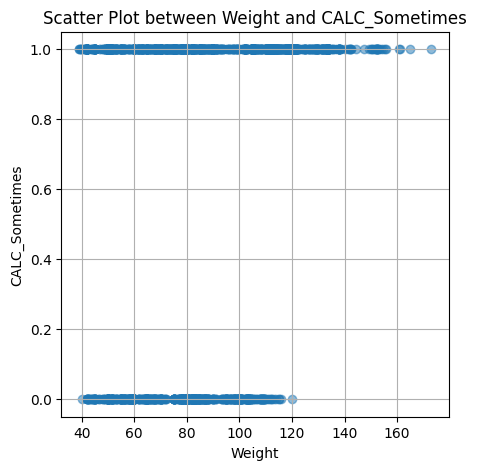

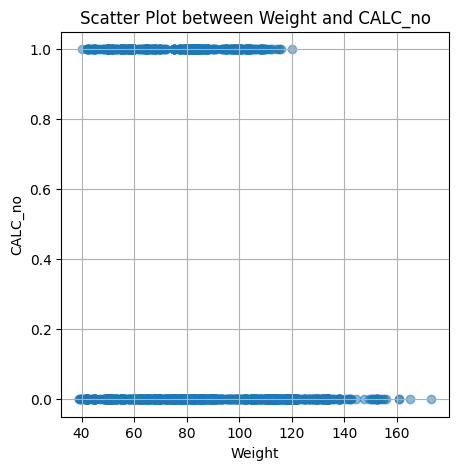

In [ ]:
draw_Scatter(X_cleaned,"Age","Weight",size=(5,5))
draw_Scatter(X_cleaned,"family_history_with_overweight","Weight",size=(5,5))
for col in ['FAVC',	'FCVC',	'NCP', 'CH2O', 'CALC_Sometimes' , 'CALC_no']:
  draw_Scatter(X_cleaned,"Weight", col, size=(5,5))
